In [87]:
%matplotlib notebook
#!pip install ucimlrepo
#!pip install ipython-sql 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np
from ucimlrepo import fetch_ucirepo 
%matplotlib inline

In [175]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

# metadata 
# print(adult.metadata) 
# variable information 
# print(adult.variables) 

# combine features and target variables
df = pd.concat([X, y], axis=1)

df = df.rename(columns={
    "education-num": "education_num",
    "marital-status": "marital_status",
    "capital-gain": "capital_gain",
    "capital-loss": "capital_loss",
    "hours-per-week": "hours_per_week",
    "native-country": "native_country"
})

# Display the combined DataFrame
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
con = sqlite3.connect('adult_database.db')
df.to_sql('adult_table', con)

48842

In [7]:
%load_ext sql

In [8]:
%sql sqlite:///adult_database.db

In [11]:
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [13]:
%%sql
SELECT * FROM adult_table
LIMIT 5;

 * sqlite:///adult_database.db
Done.


index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
#!pip install ucimlrepo
#!pip install ipython-sql 

In [15]:
%%sql
--Summary Statistics
SELECT 
    COUNT(*) AS total_records,
    SUM(CASE WHEN income = '>50K' THEN 1 ELSE 0 END) AS high_income_count,
    SUM(CASE WHEN income = '<=50K' THEN 1 ELSE 0 END) AS low_income_count,
    ROUND((SUM(CASE WHEN income = '>50K' THEN 1 ELSE 0 END)*1.0) / COUNT(*) * 100, 1) AS percent_high_income,
    ROUND((SUM(CASE WHEN sex = 'Male' THEN 1 ELSE 0 END)*1.0) / COUNT(sex) * 100, 1) AS percent_male,
    ROUND(AVG(age), 1) AS avg_age,
    ROUND(AVG(hours_per_week), 1) AS avg_work_hours
FROM adult_table;

 * sqlite:///adult_database.db
Done.


total_records,high_income_count,low_income_count,percent_high_income,percent_male,avg_age,avg_work_hours
48842,7841,24720,16.1,66.8,38.6,40.4


In [17]:
%%sql
-- Income by Education Level
SELECT education, 
       COUNT(*) AS total_people, 
       SUM(CASE WHEN income = '>50K' THEN 1 ELSE 0 END) AS high_income_count,
       ROUND(100.0 * SUM(CASE WHEN income = '>50K' THEN 1 ELSE 0 END) / COUNT(*), 2) AS high_income_percentage
FROM adult_table
GROUP BY education
ORDER BY high_income_percentage DESC;


 * sqlite:///adult_database.db
Done.


education,total_people,high_income_count,high_income_percentage
Doctorate,594,306,51.52
Prof-school,834,423,50.72
Masters,2657,959,36.09
Bachelors,8025,2221,27.68
Assoc-voc,2061,361,17.52
Assoc-acdm,1601,265,16.55
Some-college,10878,1387,12.75
HS-grad,15784,1675,10.61
12th,657,33,5.02
10th,1389,62,4.46


In [19]:
%%sql
--Occupation vs Income
SELECT occupation, 
       COUNT(*) AS total_people,
       SUM(CASE WHEN income = '>50K' THEN 1 ELSE 0 END) AS high_income_count,
       ROUND(100.0 * SUM(CASE WHEN income = '>50K' THEN 1 ELSE 0 END) / COUNT(*), 2) AS high_income_percentage
FROM adult_table
GROUP BY occupation
ORDER BY high_income_percentage DESC;


 * sqlite:///adult_database.db
Done.


occupation,total_people,high_income_count,high_income_percentage
Exec-managerial,6086,1968,32.34
Prof-specialty,6172,1859,30.12
Protective-serv,983,211,21.46
Tech-support,1446,283,19.57
Sales,5504,983,17.86
Craft-repair,6112,929,15.2
Transport-moving,2355,320,13.59
?,1843,191,10.36
Adm-clerical,5611,507,9.04
Machine-op-inspct,3022,250,8.27


In [21]:
%%sql
--Gender & Income Disparity
SELECT sex, 
       COUNT(*) AS total_people, 
       SUM(CASE WHEN income = '>50K' THEN 1 ELSE 0 END) AS high_income_count,
       ROUND(100.0 * SUM(CASE WHEN income = '>50K' THEN 1 ELSE 0 END) / COUNT(*), 2) AS high_income_percentage
FROM adult_table
GROUP BY sex;

 * sqlite:///adult_database.db
Done.


sex,total_people,high_income_count,high_income_percentage
Female,16192,1179,7.28
Male,32650,6662,20.4


In [23]:
%%sql
--Correlation Between Work Hours & Income
SELECT hours_per_week,
       COUNT(*) AS total_people,
       SUM(CASE WHEN income = '>50K' THEN 1 ELSE 0 END) AS high_income_count,
       ROUND(100.0 * SUM(CASE WHEN income = '>50K' THEN 1 ELSE 0 END) / COUNT(*), 2) AS high_income_percentage
FROM adult_table
GROUP BY hours_per_week
ORDER BY hours_per_week;


 * sqlite:///adult_database.db
Done.


hours_per_week,total_people,high_income_count,high_income_percentage
1,27,2,7.41
2,53,8,15.09
3,59,1,1.69
4,84,3,3.57
5,95,7,7.37
6,92,8,8.7
7,45,4,8.89
8,218,11,5.05
9,27,1,3.7
10,425,20,4.71


In [25]:
%%sql
--Average Age of High-Income Earners Per Education Level
SELECT education, 
       (SELECT ROUND(AVG(age),1) 
        FROM adult_table AS sub 
        WHERE sub.education = main.education 
          AND sub.income = '>50K') AS avg_age_high_income
FROM adult_table AS main
GROUP BY education
ORDER BY avg_age_high_income DESC;


 * sqlite:///adult_database.db
Done.


education,avg_age_high_income
7th-8th,52.7
1st-4th,52.0
10th,50.3
9th,48.8
Doctorate,48.6
5th-6th,46.8
Masters,45.5
Prof-school,45.1
HS-grad,45.0
12th,44.7


In [27]:
%%sql
--Create a view to see high income profiles
CREATE VIEW high_income_profiles AS
SELECT age, workclass, education, marital_status, occupation, race, sex, hours_per_week, income
FROM adult_table
WHERE income = '>50K';

 * sqlite:///adult_database.db
Done.


[]

In [29]:
%%sql
SELECT * FROM high_income_profiles WHERE education = 'Doctorate';

 * sqlite:///adult_database.db
Done.


age,workclass,education,marital_status,occupation,race,sex,hours_per_week,income
40,Private,Doctorate,Married-civ-spouse,Prof-specialty,White,Male,60,>50K
42,Private,Doctorate,Married-civ-spouse,Prof-specialty,White,Male,45,>50K
43,Federal-gov,Doctorate,Never-married,Prof-specialty,White,Female,50,>50K
48,Self-emp-not-inc,Doctorate,Married-civ-spouse,Prof-specialty,White,Male,60,>50K
58,State-gov,Doctorate,Married-civ-spouse,Prof-specialty,White,Male,1,>50K
46,Private,Doctorate,Married-civ-spouse,Exec-managerial,White,Male,60,>50K
52,Self-emp-not-inc,Doctorate,Married-civ-spouse,Prof-specialty,White,Male,60,>50K
50,Self-emp-inc,Doctorate,Separated,Prof-specialty,White,Male,40,>50K
35,Private,Doctorate,Married-civ-spouse,Prof-specialty,Asian-Pac-Islander,Male,40,>50K
46,Private,Doctorate,Divorced,Prof-specialty,White,Female,65,>50K


In [31]:
%%sql
--Finding the Most Common High-Income Profile
SELECT education, workclass, occupation, marital_status, COUNT(*) AS frequency
FROM adult_table
WHERE income = '>50K'
GROUP BY education, workclass, occupation, marital_status
ORDER BY frequency DESC
LIMIT 5;

 * sqlite:///adult_database.db
Done.


education,workclass,occupation,marital_status,frequency
Bachelors,Private,Exec-managerial,Married-civ-spouse,462
Bachelors,Private,Prof-specialty,Married-civ-spouse,293
HS-grad,Private,Craft-repair,Married-civ-spouse,279
Bachelors,Private,Sales,Married-civ-spouse,225
Masters,Private,Exec-managerial,Married-civ-spouse,197


In [33]:
query = """
SELECT age, workclass, education, marital_status, occupation, race, sex, hours_per_week, income
FROM adult_table;
"""
df = pd.read_sql(query, con)

# Convert income to binary (0 = <=50K, 1 = >50K)
df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

df.sort_values(by='income',ascending=False)

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,income
32287,54,Local-gov,Doctorate,Married-civ-spouse,Exec-managerial,White,Male,60,1
7959,49,Private,HS-grad,Married-civ-spouse,Sales,White,Male,48,1
21705,35,Private,Masters,Never-married,Prof-specialty,Asian-Pac-Islander,Female,40,1
21701,26,Private,Bachelors,Married-civ-spouse,Adm-clerical,White,Female,40,1
32326,48,Private,Doctorate,Married-civ-spouse,Prof-specialty,White,Male,45,1
...,...,...,...,...,...,...,...,...,...
18488,37,Private,HS-grad,Divorced,Craft-repair,White,Male,40,0
18490,19,Private,HS-grad,Never-married,Prof-specialty,White,Male,30,0
18491,60,Private,Assoc-voc,Divorced,Prof-specialty,White,Female,40,0
18492,54,Self-emp-not-inc,Some-college,Married-civ-spouse,Transport-moving,White,Male,30,0


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data
edu_income = df.groupby("education")["income"].mean().sort_values()


edu_income

education
Preschool       0.000000
1st-4th         0.024291
5th-6th         0.031434
11th            0.033113
9th             0.035714
7th-8th         0.041885
10th            0.044636
12th            0.050228
HS-grad         0.106120
Some-college    0.127505
Assoc-acdm      0.165522
Assoc-voc       0.175158
Bachelors       0.276760
Masters         0.360933
Prof-school     0.507194
Doctorate       0.515152
Name: income, dtype: float64

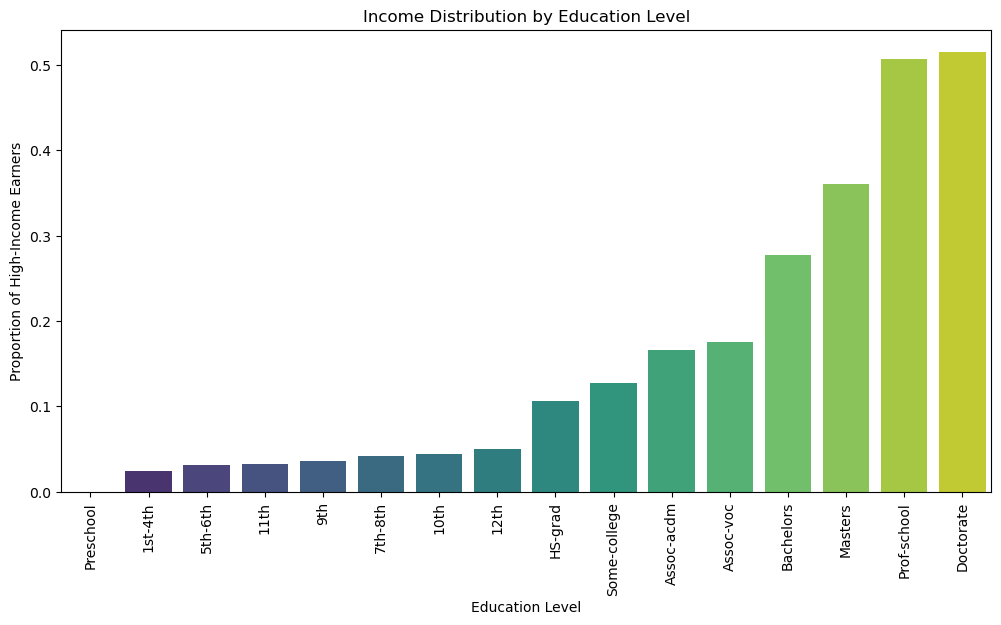

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x=edu_income.index, y=edu_income.values, hue=edu_income.index, palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.xlabel("Education Level")
plt.ylabel("Proportion of High-Income Earners")
plt.title("Income Distribution by Education Level")
plt.show()


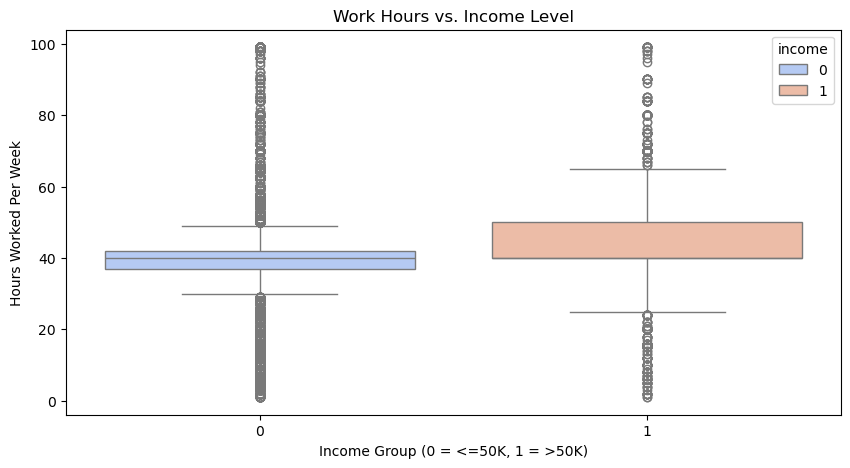

In [63]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["income"], y=df["hours_per_week"],  hue=df["income"], palette="coolwarm")
plt.xlabel("Income Group (0 = <=50K, 1 = >50K)")
plt.ylabel("Hours Worked Per Week")
plt.title("Work Hours vs. Income Level")
plt.show()

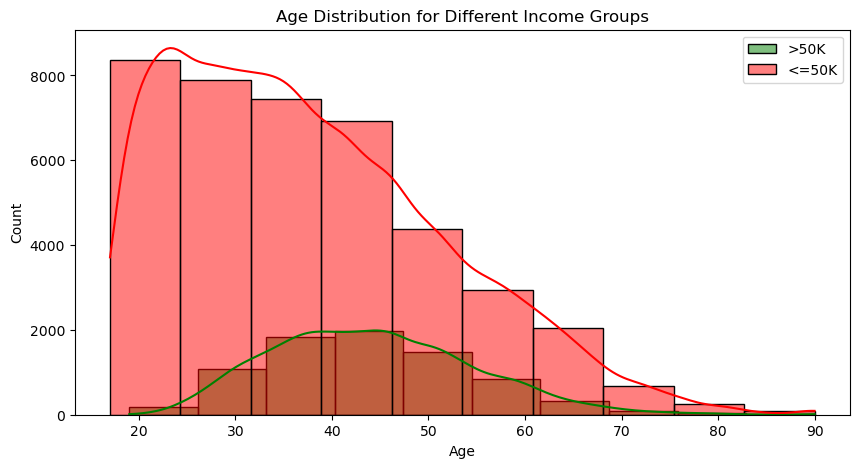

In [67]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df["income"] == 1]["age"], bins=10, color="green", label=">50K", kde=True)
sns.histplot(df[df["income"] == 0]["age"], bins=10, color="red", label="<=50K", kde=True)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution for Different Income Groups")
plt.show()


In [107]:
pd.set_option('display.max_columns', None)

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Drop missing values (if any)
df = df.dropna()

#  Define categorical columns
categorical_features = ["workclass", "education", "marital_status", "relationship", "native_country", "occupation", "race", "sex"]

# Initialize and apply One-Hot Encoder
encoder = OneHotEncoder(handle_unknown="ignore")
encoded_array = encoder.fit_transform(df[categorical_features]).toarray()  # Convert sparse to dense

# Convert to DataFrame with proper column names
encoded_cols = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and merge the encoded columns
df = df.drop(columns=categorical_features).reset_index(drop=True)
df = pd.concat([df, encoded_cols], axis=1)


# Normalize numerical features
scaler = StandardScaler()
df[["age", "hours_per_week", "capital_gain", "capital_loss", "education_num"]] = scaler.fit_transform(df[["age", "hours_per_week", "capital_gain", "capital_loss", "education_num"]])

df = df.drop(columns=["fnlwgt"])
df # Check final transformed dataset

,age,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native_country_?,native_country_Cambodia,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.026501,1.132729,0.144629,-0.217456,-0.048943,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.837781,1.132729,-0.145735,-0.217456,-2.251188,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.047252,-0.424726,-0.145735,-0.217456,-0.048943,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.059039,-1.203454,-0.145735,-0.217456,-0.048943,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [211]:
# Clean up income column
df["income"] = df["income"].replace({">50K.": ">50K", "<=50K.": "<=50K"})

# Split dataset into training & testing sets
X = df.drop(columns=["income"])
y = df["income"].map({">50K": 1, "<=50K": 0}).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Training data: (38096, 107), Testing data: (9525, 107)


In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8486
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7170
           1       0.75      0.58      0.65      2355

    accuracy                           0.85      9525
   macro avg       0.81      0.76      0.78      9525
weighted avg       0.84      0.85      0.84      9525



In [215]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8420
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7170
           1       0.71      0.61      0.66      2355

    accuracy                           0.84      9525
   macro avg       0.79      0.76      0.78      9525
weighted avg       0.84      0.84      0.84      9525



In [195]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [219]:
from xgboost import XGBClassifier

# Train model
xgb_model = XGBClassifier(eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8667
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7170
           1       0.78      0.64      0.70      2355

    accuracy                           0.87      9525
   macro avg       0.84      0.79      0.81      9525
weighted avg       0.86      0.87      0.86      9525



In [223]:
# Compare Model Performance
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.8486
Random Forest: Accuracy = 0.8420
XGBoost: Accuracy = 0.8667


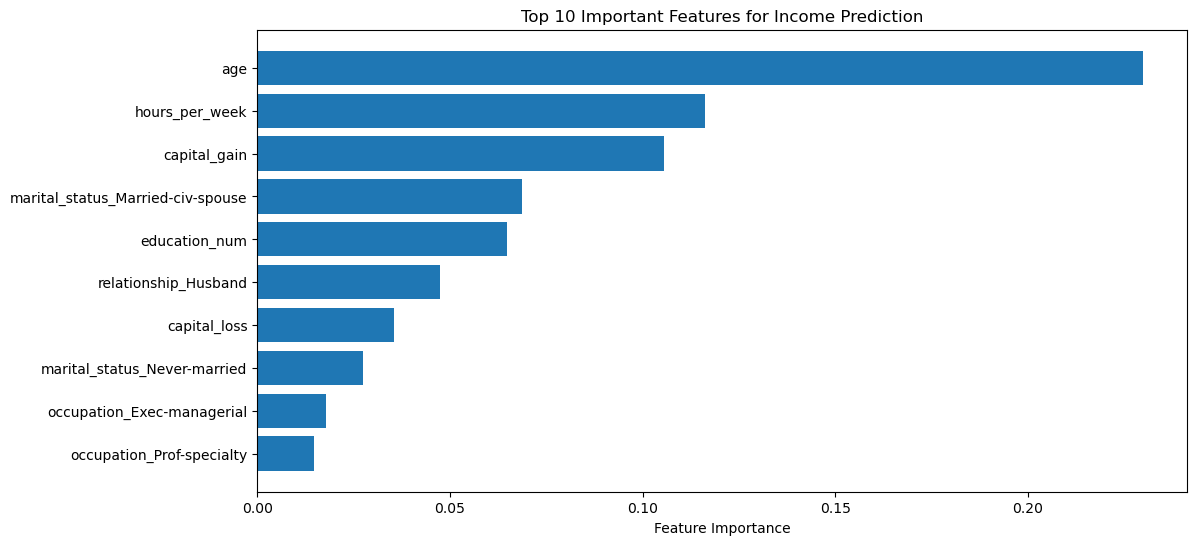

In [225]:
import numpy as np

# Feature importance from Random Forest
feat_importance = rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(12, 6))
indices = np.argsort(feat_importance)[-10:]  # Top 10 features
plt.barh(range(len(indices)), feat_importance[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features for Income Prediction")
plt.show()


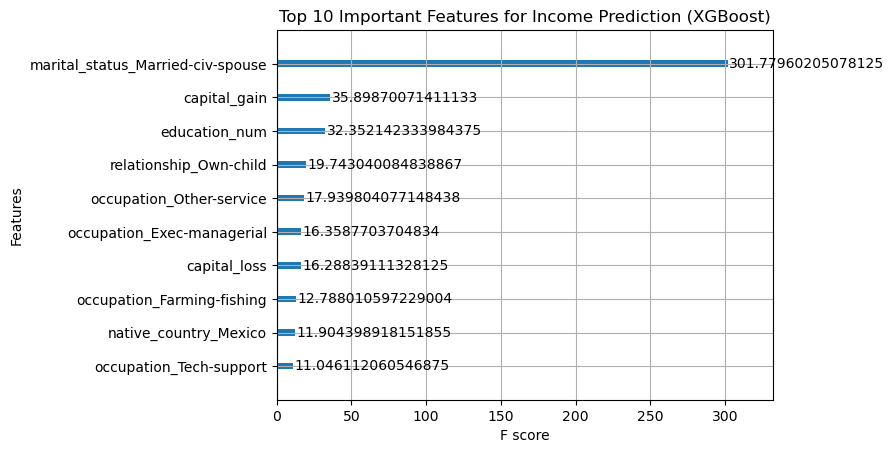

In [229]:
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(xgb_model, importance_type="gain", max_num_features=10)
plt.title("Top 10 Important Features for Income Prediction (XGBoost)")
plt.show()

In [233]:
pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 4.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


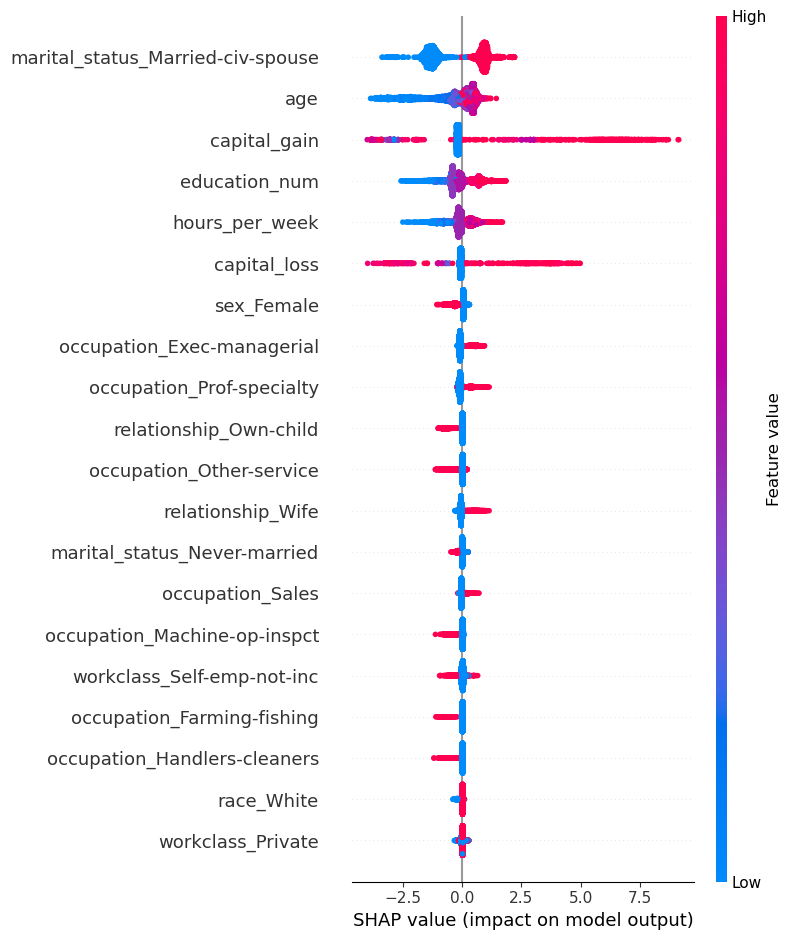

In [239]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

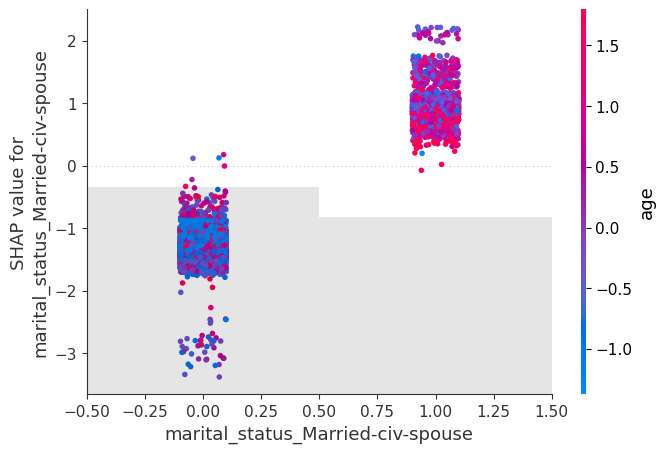

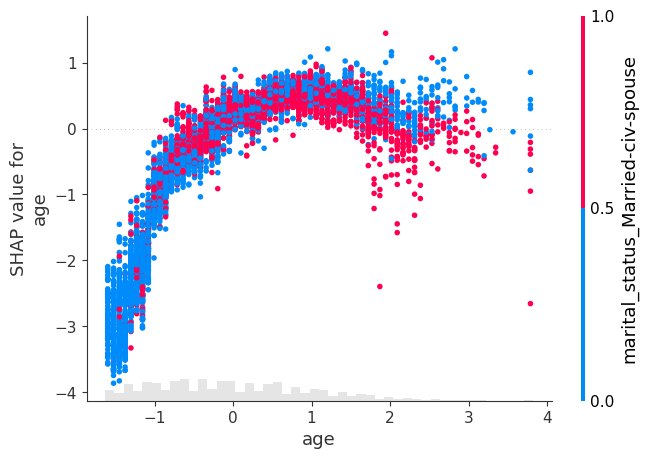

In [257]:
shap.plots.scatter(shap_values[:,"marital_status_Married-civ-spouse"], color=shap_values[:,"age"])
shap.plots.scatter(shap_values[:,"age"], color=shap_values[:,"marital_status_Married-civ-spouse"])